In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/TASK2- DATA.csv")

df.head(15)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,31,1:O1,Direct free kick,NaN
1,2O/21,NaN,NaN,NaN,A,FC Barcelona,NaN,1:OO,NaN,89,NaN,NaN,NaN
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,9,1:OO,Header,Javier Mascherano
3,Dec-13,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,26,2:O1,Right-footed shot,Xabi Alonso
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,22,O:1,Left-footed shot,Neymar
5,15/16,UEFA Champions League,last 16,O3-O8-16,H,Real Madrid,AS Roma,2:OO,CF,64,1:OO,Right-footed shot,Lucas Vazquez
6,15/16,LaLiga,3O,3/2O/16,H,Real Madrid,Sevilla FC,4:OO,LW,64,2:OO,Left-footed shot,Danilo
7,15/16,LaLiga,3,O9-12-15,A,Real Madrid,RCD Espanyol Barcelona,O:O6,LW,81,O:O6,Right-footed shot,Lucas Vazquez
8,NaN,NaN,NaN,11/2O/1O,NaN,Real Madrid,Ajax Amsterdam,NaN,NaN,NaN,O:O1,NaN,Andres Iniesta
9,13/14,LaLiga,24,2/15/14,H,FC Barcelona,Rayo Vallecano,6:OO,CF,36,2:OO,Left-footed shot,Cesc Fabregas


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1391 entries, 0 to 1563
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            1391 non-null   object
 1   Competition       1391 non-null   object
 2   Matchday          1391 non-null   object
 3   Date              1391 non-null   object
 4   Venue             1391 non-null   object
 5   Club              1391 non-null   object
 6   Opponent          1391 non-null   object
 7   Result            1391 non-null   object
 8   Playing_Position  1391 non-null   object
 9   Minute            1391 non-null   object
 10  At_score          1391 non-null   object
 11  Type              1391 non-null   object
 12  Goal_assist       946 non-null    object
dtypes: object(13)
memory usage: 152.1+ KB


In [ ]:
df.isnull().sum()

,0
Season,53
Competition,67
Matchday,57
Date,66
Venue,60
Club,56
Opponent,64
Result,64
Playing_Position,129
Minute,64


In [51]:
def nullpercentage(df, columns):
    result = {}
    for col in columns:
        if col in df.columns:
            null_count = df[col].isnull().sum()
            total_count = len(df)
            null_percentage = (null_count / total_count) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"

    return result

columns_to_check = ['Season','Competition','Matchday','Date','Venue','Club','Opponent','Result','Playing_Position','Minute','At_score','Type','Goal_assist']
null_percentage = nullpercentage(df, columns_to_check)

# Display the results properly
for column, percentage in null_percentage.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")

Season: 3.39%
Competition: 4.28%
Matchday: 3.64%
Date: 4.22%
Venue: 3.84%
Club: 3.58%
Opponent: 4.09%
Result: 4.09%
Playing_Position: 8.25%
Minute: 4.09%
At_score: 3.64%
Type: 5.69%
Goal_assist: 35.29%


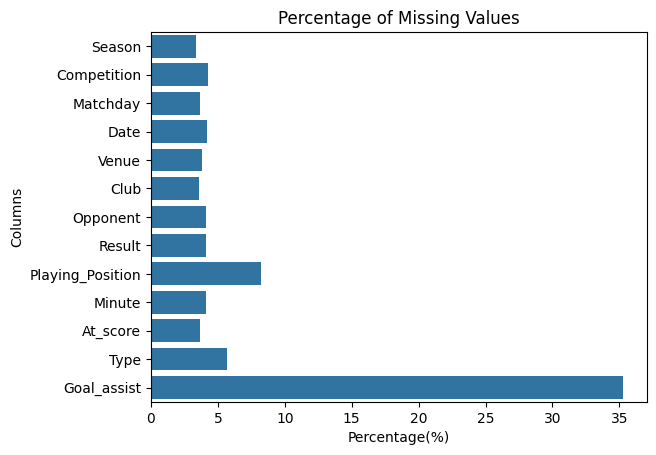

In [105]:
sns.barplot(data=null_percentage, x=null_percentage.values(), y=null_percentage.keys()).set(title="Percentage of Missing Values", xlabel="Percentage(%)", ylabel="Columns")
plt.show()

All the data sets except the Playing_Position and the Goal_assist have the percentage of missing values less than 5%, so i am dropping the rows of the null values.


In [57]:
df.dropna(subset=['Season','Competition','Matchday','Date','Venue','Club','Opponent','Result','Minute','At_score','Type'], inplace=True)

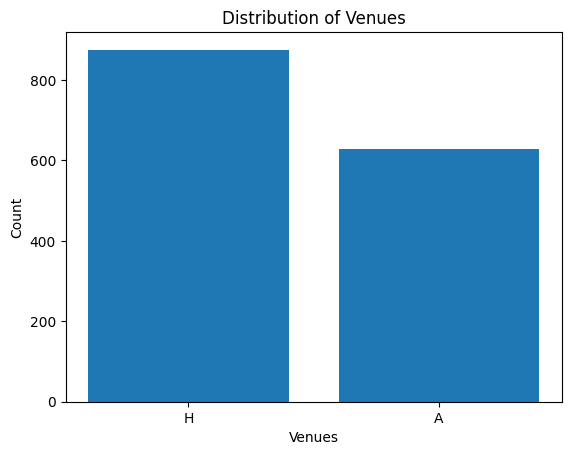

In [106]:
venue = pd.DataFrame(df["Venue"].value_counts())
plt.bar(x=venue.index, height=venue["count"])
plt.xlabel("Venues")
plt.ylabel("Count")
plt.title("Distribution of Venues")
plt.show()

**Observation:**

This bar graph shows the Relation between how many Matches all the Clubs won at Home Venue v/s Away Venue

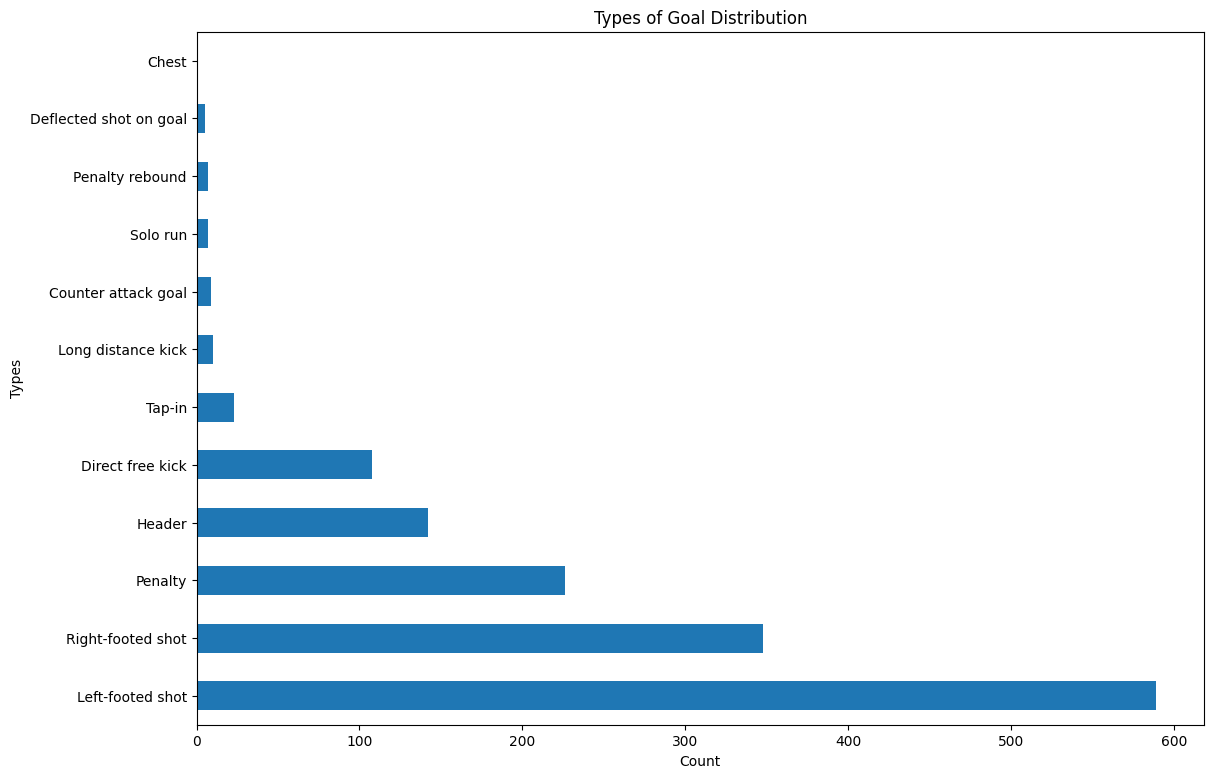

In [109]:
df['Type'].value_counts().plot(kind='barh',figsize=(13, 9))
plt.title('Types of Goal Distribution')
plt.xlabel('Count')
plt.ylabel('Types')
plt.show()

**Observation:**

This graph shows that majority of the goals which were hit are from a:
1. Left-Footed Person.
2. Right-Footed Person.
3. Penalty Shot.
4. Header Shot.
5. Direct Free Kick
and so on.













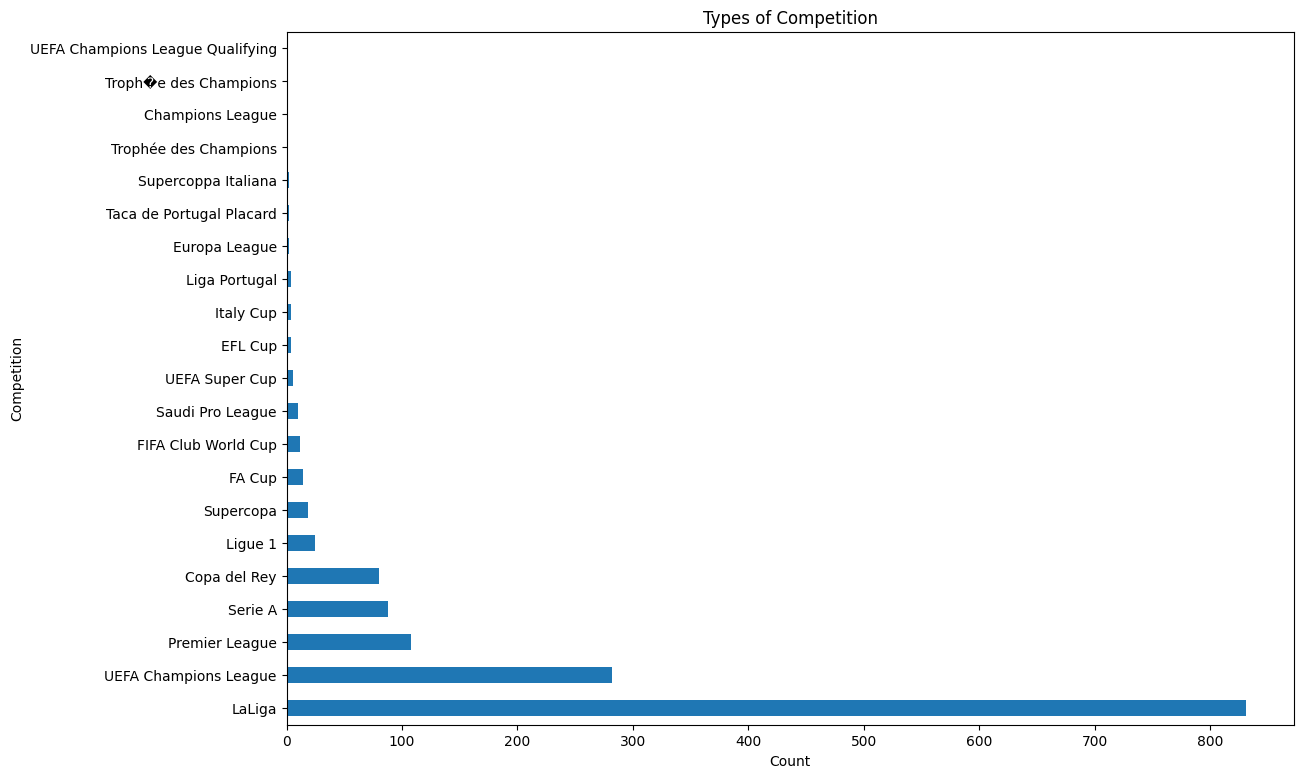

In [110]:
df['Competition'].value_counts().plot(kind='barh',figsize=(13, 9))
plt.title('Types of Competition')
plt.xlabel('Count')
plt.ylabel('Competition')
plt.show()

**Observation:**

This graph shows the Various Competitions which are being held as well as the  majority of which they are most played:
1.   LaLiga
2.   UEFA Champions League
3.   Premier League
4.   Serie A
5.   Copa del Ray
6.   Ligue 1
7.   Supercopa
and so on.


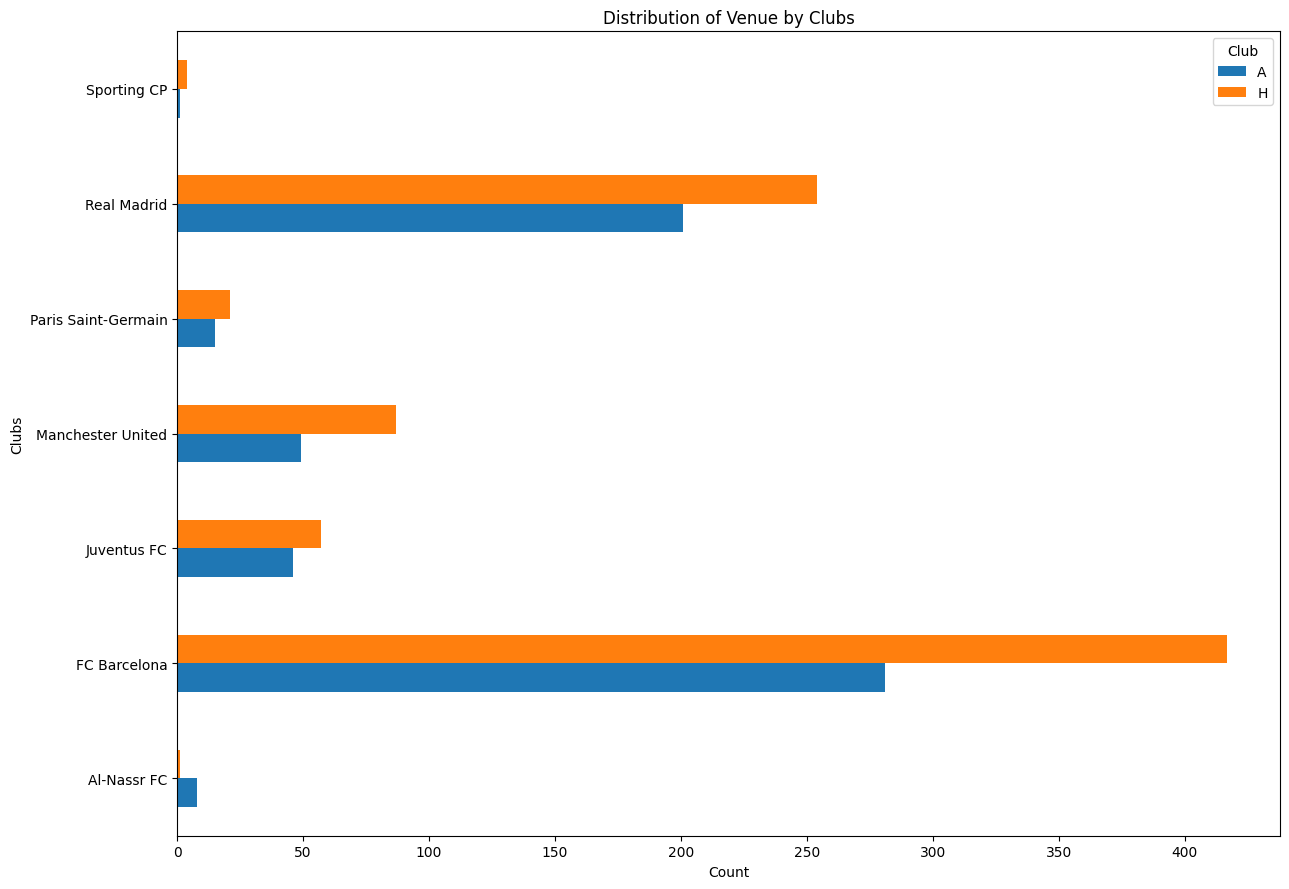

In [95]:
club_venue = df.groupby(['Club', 'Venue'])['Venue'].count().unstack()
club_venue.plot(kind='barh', figsize=(13, 9))
plt.title('Distribution of Venue by Clubs')
plt.ylabel('Clubs')
plt.xlabel('Count')
plt.legend(title='Club')
plt.tight_layout()
plt.show()

**Observation:**

This graph shows the Relation between the number of Home/Away Wins of different Clubs.